
# Install OpenPose

In [ ]:
import os
from os.path import exists, join, basename, splitext

git_repo_url = 'https://github.com/CMU-Perceptual-Computing-Lab/openpose.git'
project_name = splitext(basename(git_repo_url))[0]
if not exists(project_name):
  # see: https://github.com/CMU-Perceptual-Computing-Lab/openpose/issues/949
  # install new CMake becaue of CUDA10
  !wget -q https://cmake.org/files/v3.13/cmake-3.13.0-Linux-x86_64.tar.gz
  !tar xfz cmake-3.13.0-Linux-x86_64.tar.gz --strip-components=1 -C /usr/local
  # clone openpose
  !git clone -q --depth 1 $git_repo_url
  !sed -i 's/execute_process(COMMAND git checkout master WORKING_DIRECTORY ${CMAKE_SOURCE_DIR}\/3rdparty\/caffe)/execute_process(COMMAND git checkout f019d0dfe86f49d1140961f8c7dec22130c83154 WORKING_DIRECTORY ${CMAKE_SOURCE_DIR}\/3rdparty\/caffe)/g' openpose/CMakeLists.txt
  # install system dependencies
  !apt-get -qq install -y libatlas-base-dev libprotobuf-dev libleveldb-dev libsnappy-dev libhdf5-serial-dev protobuf-compiler libgflags-dev libgoogle-glog-dev liblmdb-dev opencl-headers ocl-icd-opencl-dev libviennacl-dev
  # install python dependencies
  !pip install -q youtube-dl
  # build openpose
  !cd openpose && rm -rf build || true && mkdir build && cd build && cmake .. && make -j`nproc`
  
from IPython.display import YouTubeVideo

Selecting previously unselected package libgflags2.2.
(Reading database ... 123991 files and directories currently installed.)
Preparing to unpack .../00-libgflags2.2_2.2.1-1_amd64.deb ...
Unpacking libgflags2.2 (2.2.1-1) ...
Selecting previously unselected package libgflags-dev.
Preparing to unpack .../01-libgflags-dev_2.2.1-1_amd64.deb ...
Unpacking libgflags-dev (2.2.1-1) ...
Selecting previously unselected package libgoogle-glog0v5.
Preparing to unpack .../02-libgoogle-glog0v5_0.3.5-1_amd64.deb ...
Unpacking libgoogle-glog0v5 (0.3.5-1) ...
Selecting previously unselected package libgoogle-glog-dev.
Preparing to unpack .../03-libgoogle-glog-dev_0.3.5-1_amd64.deb ...
Unpacking libgoogle-glog-dev (0.3.5-1) ...
Selecting previously unselected package libhdf5-serial-dev.
Preparing to unpack .../04-libhdf5-serial-dev_1.10.0-patch1+docs-4_all.deb ...
Unpacking libhdf5-serial-dev (1.10.0-patch1+docs-4) ...
Selecting previously unselected package libleveldb1v5:amd64.
Preparing to unpack ...

# Mount Drive

In [ ]:
# mount drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Imports


In [ ]:
import json, os
import glob, csv
import pandas as pd
import numpy as np
import zipfile

In [ ]:
"""
  the zipped folder contains a label.csv file and a image folder containing all the 1269 images.
  Instead of loading the files directly from google drive, it is much efficient to just load the dataset into google colab's cache and work from there.
"""
dataset_directory = '/content/drive/MyDrive/ML_Intern/Dataset.zip'
zip_ref = zipfile.ZipFile(dataset_directory, 'r')
zip_ref.extractall('Dataset')

# Extract Body Key Points from Images
Extracts body keypoints for each image and saves it in a json file in the output_json folder.  


In [ ]:
!cd openpose && ./build/examples/openpose/openpose.bin --image_dir ../Dataset/Dataset/images --write_json ./output_json/ --display 0 --render_pose 0

Starting OpenPose demo...
Configuring OpenPose...
Starting thread(s)...
Auto-detecting all available GPUs... Detected 1 GPU(s), using 1 of them starting at GPU 0.
OpenPose demo successfully finished. Total time: 372.227312 seconds.


# Create unbalanced_keypoints.csv

In [ ]:
# take all the json files in the output_json folder

files = glob.glob('openpose/output_json/*', recursive=True)

# create a dataframe that will have a column for Image Ids and another for Extracted Body Keypoints

data = pd.DataFrame(columns=['Image_ID', 'Body_KeyPoints'])

# loop through all the json files

for single_file in files:
  
  with open(single_file, 'r') as f:
      df = pd.read_json(single_file)

      # process the filename so that it only contains the Image_Ids are left
      filename = os.path.basename(single_file)
      # Typecast the filename to int for convenience
      filename = int(filename.split('_')[1])

      """
        For some images Openpose fails to detect any people and thus no body_keypoints are generated for that image.
        Therefore, while accessing those images.json files that have empty keypoints, it raises an IndexError.
        Thus, error handling is required. Additionally, the json files that have no body keypoints are set Nan, so that we can remove them later
        after labeling them.  
      """

      try:
        # take the body key points
         body_point_list = df.people.values.tolist()[0]['pose_keypoints_2d']
         # store the filename and its corresponding body keypoints
         df2 = {'Image_ID': filename, 'Body_KeyPoints': body_point_list}
         # append the dataframe one row at a time
         data = data.append(df2, ignore_index=True)
      except IndexError:
        print(f'{single_file} has no body_keypoints')
        # leave it empty
        body_point_list = np.nan
        # store the filename and its corresponding body keypoints
        df2 = {'Image_ID': filename, 'Body_KeyPoints': body_point_list}
        # append the dataframe one row at a time
        data = data.append(df2, ignore_index=True)

data.head()
print(data.shape)

openpose/output_json/Image_6696_keypoints.json has no body_keypoints
openpose/output_json/Image_1991_keypoints.json has no body_keypoints
openpose/output_json/Image_411_keypoints.json has no body_keypoints
openpose/output_json/Image_8326_keypoints.json has no body_keypoints
openpose/output_json/Image_677_keypoints.json has no body_keypoints
openpose/output_json/Image_8678_keypoints.json has no body_keypoints
openpose/output_json/Image_4921_keypoints.json has no body_keypoints
openpose/output_json/Image_452_keypoints.json has no body_keypoints
openpose/output_json/Image_11948_keypoints.json has no body_keypoints
openpose/output_json/Image_10261_keypoints.json has no body_keypoints
openpose/output_json/Image_828_keypoints.json has no body_keypoints
openpose/output_json/Image_11041_keypoints.json has no body_keypoints
openpose/output_json/Image_8624_keypoints.json has no body_keypoints
openpose/output_json/Image_6000_keypoints.json has no body_keypoints
openpose/output_json/Image_7478_key

In [ ]:
"""
  Sorting the dataframe based on integer image ids is very convenient because it will be much easier to just join the label column from the labels.csv file
  because labels.csv file is already sorted based on image_ids. 
"""
# We only need to sort the Image_ID column and the Body_KeyPoints as Labels is already consistent. 
sorted_df = data.sort_values('Image_ID')
sorted_df

,Image_ID,Body_KeyPoints
1026,1,"[89.0833, 37.2389, 0.737794, 103.759, 68.3305,..."
846,4,"[120.679, 96.9322, 0.523272, 124.138, 130.57, ..."
1037,6,"[54.5647, 52.9926, 0.521072, 0, 0, 0, 0, 0, 0,..."
564,15,"[150.663, 101.888, 0.6505639999999999, 0, 0, 0..."
427,33,"[143.362, 47.5761, 0.8635879999999999, 121.608..."
...,...,...
1034,12527,"[0, 0, 0, 96.9438, 63.3981, 0.872904, 106.882,..."
902,12577,"[137.131, 89.5116, 0.776347, 118.494, 101.442,..."
1092,12594,"[156.417, 91.8403, 0.072347, 0, 0, 0, 0, 0, 0,..."
907,12596,"[125.156, 37.5882, 0.863397, 135.505, 52.9222,..."


In [ ]:
unbalanced_df = sorted_df
unbalanced_df.to_csv('Output/unbalanced_keypoints_without_labels.csv', index=False)

In [ ]:
unbalanced_df

,Image_ID,Body_KeyPoints
1026,1,"[89.0833, 37.2389, 0.737794, 103.759, 68.3305,..."
846,4,"[120.679, 96.9322, 0.523272, 124.138, 130.57, ..."
1037,6,"[54.5647, 52.9926, 0.521072, 0, 0, 0, 0, 0, 0,..."
564,15,"[150.663, 101.888, 0.6505639999999999, 0, 0, 0..."
427,33,"[143.362, 47.5761, 0.8635879999999999, 121.608..."
...,...,...
1034,12527,"[0, 0, 0, 96.9438, 63.3981, 0.872904, 106.882,..."
902,12577,"[137.131, 89.5116, 0.776347, 118.494, 101.442,..."
1092,12594,"[156.417, 91.8403, 0.072347, 0, 0, 0, 0, 0, 0,..."
907,12596,"[125.156, 37.5882, 0.863397, 135.505, 52.9222,..."


# Labeling the keypoints

In [ ]:
# Read the csv files

label_csv = pd.read_csv('Dataset/Dataset/labels.csv')
unbalanced_keypoints = pd.read_csv('Output/unbalanced_keypoints_without_labels.csv')

In [ ]:
label_csv

,Image_Ids,Labels
0,Image_1.jpg,sitting
1,Image_4.jpg,sleeping
2,Image_6.jpg,sleeping
3,Image_15.jpg,sleeping
4,Image_33.jpg,sitting
...,...,...
1264,Image_12527.jpg,running
1265,Image_12577.jpg,sleeping
1266,Image_12594.jpg,sleeping
1267,Image_12596.jpg,sitting


In [ ]:
# join the label column from the label.csv file

unbalanced_keypoints = unbalanced_keypoints.join(label_csv['Labels'])

## Check empty fields

In [ ]:
unbalanced_keypoints[unbalanced_keypoints['Body_KeyPoints'].isna()]

,Image_ID,Body_KeyPoints,Labels
11,82.0,NaN,sleeping
14,122.0,NaN,sleeping
18,179.0,NaN,sleeping
25,222.0,NaN,sitting
29,239.0,NaN,sleeping
...,...,...,...
1125,11062.0,NaN,sleeping
1144,11278.0,NaN,sleeping
1179,11633.0,NaN,sleeping
1204,11948.0,NaN,sleeping


In [ ]:
unbalanced_keypoints.dropna(subset=['Body_KeyPoints'], inplace=True)

In [ ]:
unbalanced_keypoints

,Image_ID,Body_KeyPoints,Labels
0,1.0,"[89.0833, 37.2389, 0.737794, 103.759, 68.3305,...",sitting
1,4.0,"[120.679, 96.9322, 0.523272, 124.138, 130.57, ...",sleeping
2,6.0,"[54.5647, 52.9926, 0.521072, 0, 0, 0, 0, 0, 0,...",sleeping
3,15.0,"[150.663, 101.888, 0.6505639999999999, 0, 0, 0...",sleeping
4,33.0,"[143.362, 47.5761, 0.8635879999999999, 121.608...",sitting
...,...,...,...
1264,12527.0,"[0, 0, 0, 96.9438, 63.3981, 0.872904, 106.882,...",running
1265,12577.0,"[137.131, 89.5116, 0.776347, 118.494, 101.442,...",sleeping
1266,12594.0,"[156.417, 91.8403, 0.072347, 0, 0, 0, 0, 0, 0,...",sleeping
1267,12596.0,"[125.156, 37.5882, 0.863397, 135.505, 52.9222,...",sitting


In [ ]:
unbalanced_keypoints['Body_KeyPoints'].values # string which will later be a problem

array(['[89.0833, 37.2389, 0.737794, 103.759, 68.3305, 0.574525, 69.1978, 60.5592, 0.447662, 54.0863, 95.1234, 0.38034599999999996, 49.3179, 112.419, 0.6080169999999999, 138.759, 74.3856, 0.41926, 143.078, 133.144, 0.10855899999999999, 0, 0, 0, 88.2072, 150.433, 0.0787219, 61.8512, 138.331, 0.102743, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 84.3057, 29.4499, 0.815855, 98.5848, 29.8994, 0.829942, 0, 0, 0, 117.168, 30.3177, 0.673982, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]',
       '[120.679, 96.9322, 0.523272, 124.138, 130.57, 0.10765000000000001, 83.0939, 119.193, 0.050945, 0, 0, 0, 0, 0, 0, 147.387, 145.415, 0.0930196, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 105.355, 91.4972, 0.254838, 124.639, 78.6463, 0.584078, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]',
       '[54.5647, 52.9926, 0.521072, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [ ]:
# Save the final preprocessed unbalanced keypoints to a csv file

unbalanced_keypoints.to_csv('Output/Unbalanced_Keypoints.csv', index=False)

# Data Visualization
Useful to know the distribution of the data.

In [ ]:
unbalanced_keypoints['Labels'].value_counts()

sleeping    612
sitting     374
running     186
Name: Labels, dtype: int64

Clearly the dataset is uneven. Where the majority class is Sleeping and the rest are minority classes.

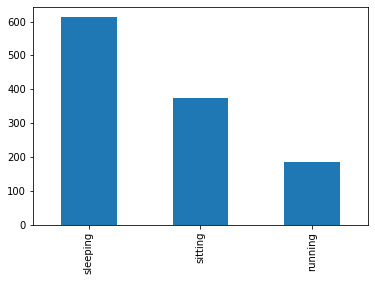

In [ ]:
unbalanced_keypoints['Labels'].value_counts().plot.bar()

# Balance the Dataset


## Imports


In [ ]:
import imblearn
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot
from sklearn.feature_extraction.text import CountVectorizer



In [ ]:
# split the dataset into features and labels
y = unbalanced_keypoints['Labels']
X = unbalanced_keypoints['Body_KeyPoints']

The body keypoints were originally stored as a list. After saving the dataframe to a csv file, the list object turned into string. In order to resample the dataset, I had to convert text data to numeric before applying SMOTE, but that lead to something else :(
  

In [ ]:
# Converting text to numeric

vectorizer = CountVectorizer()
vectorizer.fit(X.values.ravel())
X = vectorizer.transform(X.values.ravel())


X_train = X.toarray()



Class=1, n=374 (31.911%)
Class=2, n=612 (52.218%)
Class=0, n=186 (15.870%)


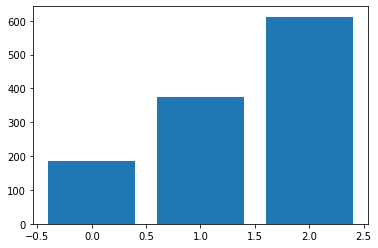

In [ ]:
y = LabelEncoder().fit_transform(y)
counter = Counter(y)

for k, v in counter.items():
  percentage = v / len(y) * 100
  print('Class=%d, n=%d (%.3f%%)' % (k, v, percentage))

pyplot.bar(counter.keys(), counter.values())
pyplot.show()

## Applying SMOTE

In [ ]:
# Transform the Dataset

oversample = SMOTE()
X_resample, y_resample = oversample.fit_resample(X_train, y)

Class=1, n=612 (33.333%)
Class=2, n=612 (33.333%)
Class=0, n=612 (33.333%)


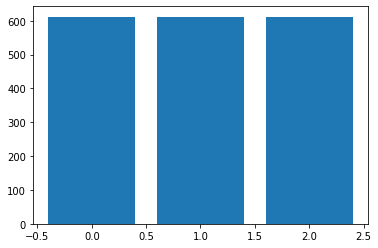

In [ ]:
y = LabelEncoder().fit_transform(y_resample)
counter = Counter(y)

for k, v in counter.items():
  percentage = v / len(y) * 100
  print('Class=%d, n=%d (%.3f%%)' % (k, v, percentage))

pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [ ]:
balanced_keypoints = pd.DataFrame(columns=['Body_KeyPoints', 'Labels'])

In [ ]:
balanced_keypoints['Body_KeyPoints'] = X_resample.tolist()

In [ ]:
balanced_keypoints['Labels'] = y_resample

In [ ]:
balanced_keypoints.to_csv('Output/Balanced_KeyPoints.csv', index=False)

In [ ]:
balanced_keypoints.info

<bound method DataFrame.info of                                          Body_KeyPoints    Labels
0     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   sitting
1     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  sleeping
2     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  sleeping
3     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  sleeping
4     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   sitting
...                                                 ...       ...
1831  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   sitting
1832  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   sitting
1833  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   sitting
1834  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   sitting
1835  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   sitting

[1836 rows x 2 columns]>